In [18]:
import numpy as np
import pandas as pd
from IPython.display import display
import re
from gensim.parsing.preprocessing import strip_short, remove_stopwords, strip_non_alphanum, strip_numeric, strip_multiple_whitespaces, strip_punctuation, strip_tags

In [19]:
df = pd.read_csv('./data/auto_tweets.csv')

In [20]:
df.head()

,text,sentiment,auto_sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,0
1,is upset that he can't update his Facebook by ...,0,-1
2,@Kenichan I dived many times for the ball. Man...,0,1
3,my whole body feels itchy and like its on fire,0,-1
4,"@nationwideclass no, it's not behaving at all....",0,-1


In [21]:
def text_preprocessing(text):
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    text = strip_tags(text)
    text = strip_non_alphanum(text)
    text = strip_punctuation(text)
    text = strip_numeric(text)
    text = text.lower()
    text = strip_multiple_whitespaces(text)
    
    return text

In [22]:
df['text'] = df['text'].apply(text_preprocessing)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [24]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['text']) 

In [25]:
from sklearn.model_selection import train_test_split

In [79]:
train_size = 0.8
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['auto_sentiment'], stratify = df['auto_sentiment'], train_size = train_size, test_size = test_size, random_state = 5)

In [80]:
display(X_train.shape)
display(X_test.shape)

(1280000, 310949)

(320000, 310949)

In [81]:
import pickle
import os
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import MultinomialNB
read = False
should_pickle = True
filename = "model.pkl"

if not read:
    model = MultinomialNB()
    model.fit(X_train, y_train)
    if should_pickle:
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
else:
    with open(filename, 'rb') as file:
        pickle_model = pickle.load(filename)


In [82]:
from sklearn import metrics

In [83]:
predicted = model.predict(X_test)
accuracy = metrics.accuracy_score(predicted, y_test)
fscore = metrics.precision_recall_fscore_support(y_test, predicted, average='weighted')

In [84]:
display(accuracy)
display(fscore)

0.769796875

(0.7771663046718659, 0.769796875, 0.7647279225309045, None)

In [85]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

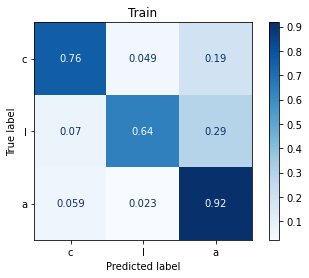

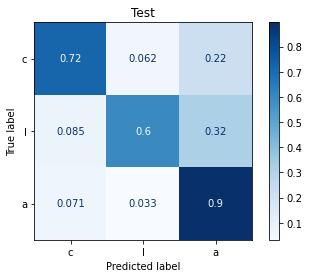

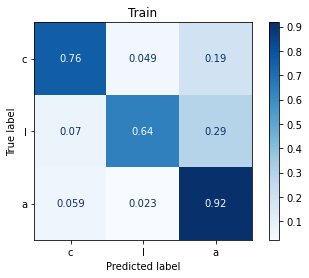

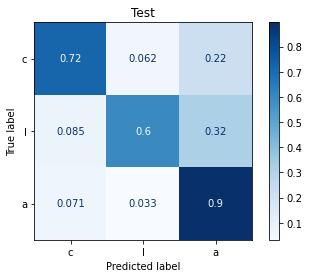

In [86]:
Xs = [X_train, X_test]
Ys = [y_train, y_test]
names = ['Train', 'Test']

save_img = False

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    for X, y, name in zip(Xs, Ys, names):
        disp = plot_confusion_matrix(model, X, y,
                                     display_labels="class_names",
                                     cmap=plt.cm.Blues,
                                     normalize='true',
                                    )
        disp.ax_.set_title(name)
        if save_img:
            plt.savefig('{}.png'.format(name))

In [88]:
def sentiment_mapper(sentiment):
    if sentiment == 'negative':
        return 0
    if sentiment == 'neutral':
        return 1
    if sentiment == 'positive':
        return 2

In [ ]:
df['auto_sentiment'] = df['airline_sentiment'].apply(sentiment_mapper)